# Raport 2. Szeregi ARMA

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from consts import * 

In [4]:
def load_data(path):
    """
    Load data from path
    
    param path : str
        Path to the file 

    return : pd.DataFrame
    """

    return pd.read_csv(path)


In [5]:
def plot_time_series(data, col_name, title=None, **kwargs):
    """
    Plot data

    param data : pd.DataFrame
        Data to plot
    """

    plt.plot(data[col_name], **kwargs)
    plt.xlabel('Numer obserwacji')
    plt.ylabel('Obciążenie sieci')
    plt.grid(True)
    if title: 
        plt.title(title)
    plt.show()

In [6]:
electricity_data = load_data('../data/two_year_data.csv')

In [7]:
two_day_data = electricity_data[0:2*SAMPLES_PER_DAY]
two_week_data = electricity_data[0:2*SAMPLES_PER_WEEK]

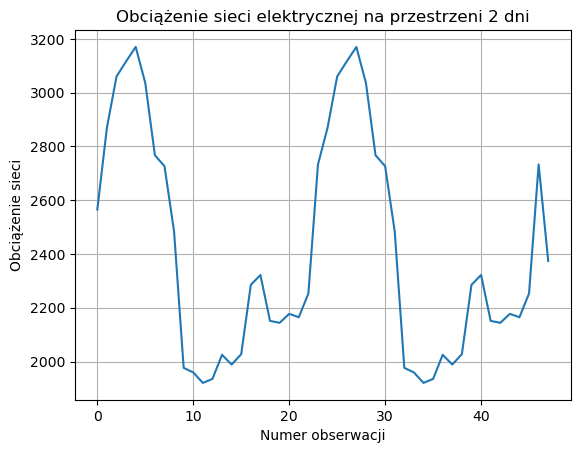

In [8]:
plot_time_series(two_day_data, 'fixing_i_volume', title='Obciążenie sieci elektrycznej na przestrzeni 2 dni')

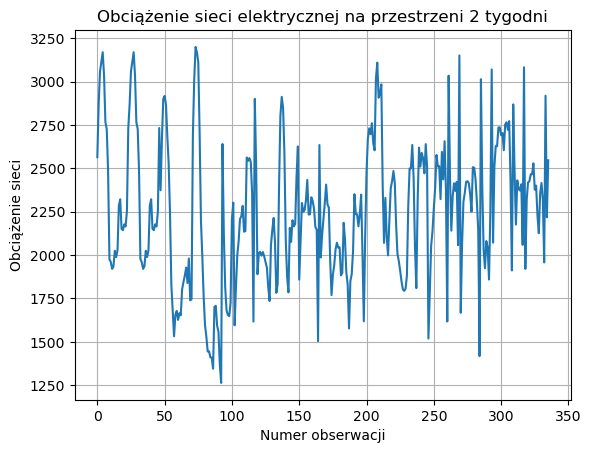

In [9]:
plot_time_series(two_week_data, 'fixing_i_volume', title='Obciążenie sieci elektrycznej na przestrzeni 2 tygodni')

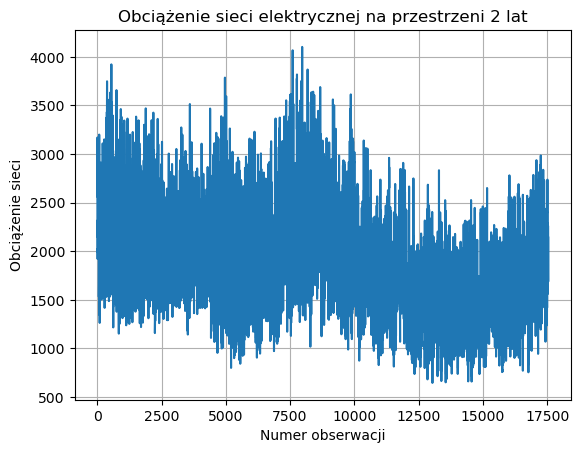

In [10]:
plot_time_series(electricity_data, 'fixing_i_volume', title='Obciążenie sieci elektrycznej na przestrzeni 2 lat')

### Statystyki opisowe

In [11]:
electricity_data.describe()

,fixing_i_volume
count,17542.000000
mean,1832.193154
std,501.940253
min,645.200000
25%,1468.425000
50%,1778.050000
75%,2124.350000
max,4102.700000


### ACF i PACF

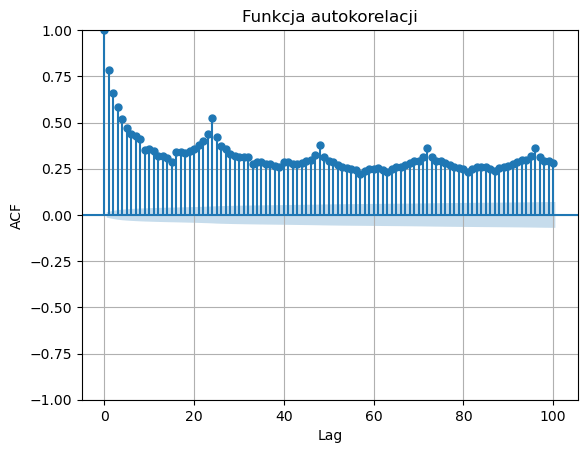

In [12]:
plot_acf(
    electricity_data['fixing_i_volume'],
    lags=100, title="Funkcja autokorelacji",
);
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid()

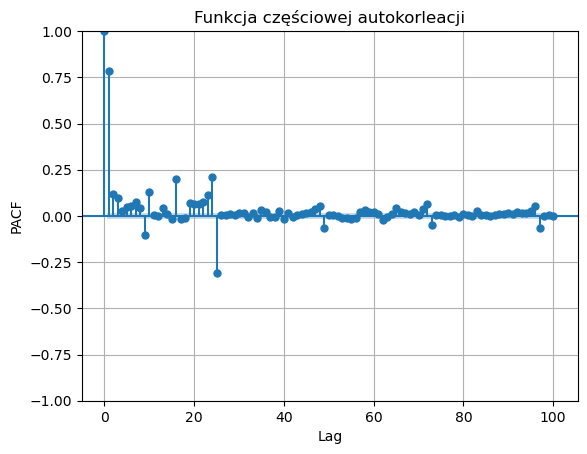

In [13]:
plot_pacf(
    electricity_data['fixing_i_volume'], 
    lags=100, title="Funkcja częściowej autokorleacji",
);
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid()

### Test ADF

In [21]:
test_result = adfuller(electricity_data['fixing_i_volume'], regression='n')

In [22]:
(test_result[0], test_result[1])

(-1.6981212849336598, 0.084747458644919)